In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Goal

- Titanic tutorial(Random Forest 사용) 의 성능인 0.77511 보다 좋은 성능 내기

# Sequence

1. "눈"으로 데이터 분석
    - 어떤 column이 의미 있을지 파악
    - NaN 값처럼 전처리가 꼭 필요한 부분들 파악
2. 데이터 전처리
    - 데이터를 모두 계산이 가능한 Vector의 형태로 변경 (숫자로 모두 변경)
3. "수학"으로 데이터 분석
4. 여러가지 모델을 사용하여 성능 비교 및 분석
5. 가장 좋은 성능을 낸 모델을 사용하여 test set에 적용

# 1. "눈"으로 데이터 분석

- 먼저 눈으로 어떤 데이터가 있는지 확인한다.
    - random 하게 30개 정도의 데이터를 뽑아 이를 여러번 수행하여 데이터를 확인한다.

In [84]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.sample(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.3750,NaN,S
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S
451,452,0,3,"Hagland, Mr. Ingvald Olai Olsen",male,NaN,1,0,65303,19.9667,NaN,S


- 모르는 단어 정리 ref(https://jfun.tistory.com/136)
    - pclass: 승객 등급
    - SibSP: 함께 탑승한 형제 또는 배우자 수
    - parch: 함께 탐승한 부모 또는 자녀 수
    - cabin: 선실 번호
    - embarked: S=Southernhampton, C=Cherbourg, Q=Queenstown
    - Fare: 요금
<br><br>    
- 의미 없는 것으로 판단되는 column
    - PassengetId, Name, Ticket등은 직관적으로 판단했을 때 생존 가능성에 영향을 준다고 보기 어려움.<br>
      Name은 먼저 Drop하고, Ticket은 혹시 모르니 구체적으로 분석.

In [85]:
# Ticket column을 자세히 살펴 Name과 같이 Unique한지 판단
train_df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

- unique한 값이 681개나 있으니 사실상 이름과 같이 거의 unique한 값이라고 볼 수 있다.<br>
  그러면 이름과 같이 표에 랜덤하게 적힌 의미 없는 문자열이라고 볼 수 있다.

# 2. 데이터 전처리

- 전처리 방향
    1. PassengerId, Name, Ticket은 결과에 영향을 주기 어려울 것으로 판단하여 column들을 drop한다.
    2. Cabin 같은 경우 NaN값이 너무 많아 Drop
    3. Age의 경우 NaN이 있을 경우 해당 row를 drop (Age는 직관적으로 생존 가능성에 큰 영향을 미침)
    4. Sex, Embarked columns와 같은 string columns를 Vectorize 한다.
    5. Label과 Train data 분리
    6. Normalize
<br><br>
- __test data에 대하여 predict 할 때도 같은 전처리 과정을 거쳐야하므로 함수로 만들어놓는다.__

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


def preprocess_titanic_data(train_ori_df, test_ori_df):
    # 1. PassengerId, Name, Ticket은 결과에 영향을 주기 어려울 것으로 판단하여 column들을 drop한다. 
    # 2. Cabin 같은 경우 NaN값이 너무 많아 Drop
    train_df = train_ori_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=False)
    test_df = test_ori_df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=False)

    # 3.1. Trainset에서 Age의 경우 NaN이 있을 경우 해당 row를 drop (Age는 직관적으로 생존 가능성에 큰 영향을 미침)
    train_df.dropna(subset=["Age"], inplace=True)
    
    # 4. Sex, Embarked columns와 같은 string columns를 Vectorize 한다.
    le = LabelEncoder()
    train_df['Sex'] = le.fit_transform(train_df['Sex'])
    train_df['Embarked'] = le.fit_transform(train_df['Embarked'])
    test_df['Sex'] = le.fit_transform(test_df['Sex'])
    test_df['Embarked'] = le.fit_transform(test_df['Embarked'])
    
    # 5. trainset의 Label과 Train data 분리
    y_df = train_df["Survived"]
    train_df.drop(["Survived"], axis=1, inplace=True)
    
    # 6. Trainset으로 구한 평균과 분산으로 Train, Test를 Normalize
    scaler = StandardScaler()
    scaler.fit(train_df) 
    
    # Testset은 평균으로 채움
    test_df.fillna(test_df.mean(), inplace=True)
    X_train = scaler.transform(train_df)
    X_test = scaler.transform(test_df)
    y = y_df.to_numpy()
    
    return X_train, X_test, y

test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
PassengerId = test_df["PassengerId"]
X_train, X_test, y = preprocess_titanic_data(train_df, test_df)
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}, y: {y.shape}')
print(f'X_train\n{X_train[:5]}')
print(f'X_test\n{X_test[:5]}')
print(f'y\n{y[:5]}')

X_train: (714, 7), X_test: (418, 7), y: (714,)
X_train
[[ 0.91123237  0.75905134 -0.53037664  0.52457013 -0.50589515 -0.51897787
   0.51292383]
 [-1.47636364 -1.31743394  0.57183099  0.52457013 -0.50589515  0.69189675
  -2.04810845]
 [ 0.91123237 -1.31743394 -0.25482473 -0.55170307 -0.50589515 -0.50621356
   0.51292383]
 [-1.47636364 -1.31743394  0.36516706  0.52457013 -0.50589515  0.34804915
   0.51292383]
 [ 0.91123237  0.75905134  0.36516706 -0.55170307 -0.50589515 -0.5038498
   0.51292383]]
X_test
[[ 0.91123237  0.75905134  0.33072307 -0.55170307 -0.50589515 -0.50802515
  -0.76759231]
 [ 0.91123237 -1.31743394  1.19182279  0.52457013 -0.50589515 -0.52370538
   0.51292383]
 [-0.28256564  0.75905134  2.22514245 -0.55170307 -0.50589515 -0.47288455
  -0.76759231]
 [ 0.91123237  0.75905134 -0.18593675 -0.55170307 -0.50589515 -0.49226738
   0.51292383]
 [ 0.91123237 -1.31743394 -0.53037664  0.52457013  0.66686178 -0.42371835
   0.51292383]]
y
[0 1 1 1 0]


# 3. "수학"으로 데이터 분석

1. Correlation
2. PCA

### 3.1. Correlation map을 heatmap으로 표현

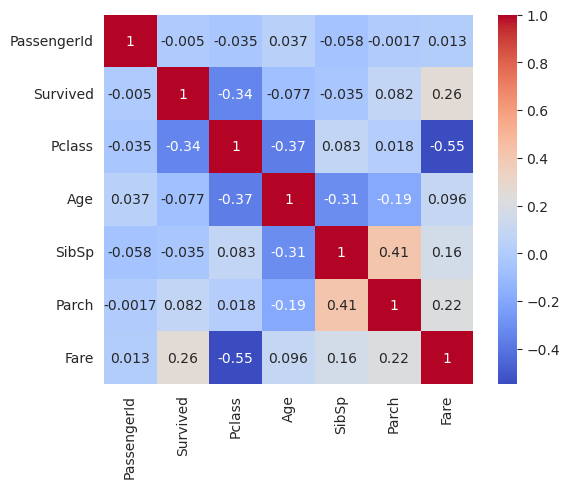

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = train_df.corr().columns
sns.heatmap(train_df.corr().to_numpy(), annot=True, cmap='coolwarm', square=True, xticklabels=columns, yticklabels=columns)

# Show the plot
plt.show()

- Correlation map 분석
    1. Sex row를 보면 Sex, PClass, Fare, Embarked ... 의 순으로 |cor| 값이 크다.<br>
       이를 다시 말하자면 남자 여자에 따라사 생존율이 가장 크게 달랐고, 그 뒤로 승객 등급,<br>
       요금, 승선 장소의 순으로 생존 확률이 달랐다는 것이다. 
    2. PClass row를 보면 Fare와 상관관계가 아주 큰데 승객 등급이 높을 수록 비싼 요금을 내는건<br>
       당연하다. 그 외에도 Age, SibSp, SibSp, Parch, Fare, Embarked 의 상관관계가 높다.<br>
       Embarked와 Fare의 상관관계가 높은 것으로 보아 요금에 따라 승선 장소가 달랐다는 것을 파악할 수 있다.

### 3.2. PCA 분석

- 죽은 사람은 빨간색, 산 사람은 초록색으로 칠함.
- 두 집단간에 뚜렷한 차이를 보일 수록 (사람이 구분하기 쉬울 수록) 컴퓨터가 구분하기 쉽다.

In [88]:
def get_pca(X_train, X_test):
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    # Create a PCA object
    pca = PCA()

    # Apply PCA to the standardized data
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    return X_train_pca, X_test_pca
    
X_train_pca, X_test_pca = get_pca(X_train, X_test)
    
# Convert the PCA results to a pandas dataframe
X_pca_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

# Print the first few rows of the PCA dataframe
X_pca_df.sample(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
518,0.109576,1.085151,-0.557916,-0.972807,0.887596,-0.750264,0.483754
25,-0.102285,-2.134066,1.351739,0.167370,0.933612,-0.761898,0.264882
402,1.994797,-0.122416,-1.662482,1.629181,-0.677778,0.097010,-0.468149
368,0.504694,-1.751775,1.064092,0.369505,-0.068444,-0.153611,-0.756161
86,0.095165,0.997170,-2.459125,-0.745838,0.027225,-0.910210,0.313707


### 3.2.1. 2D Visualization

### Trainset

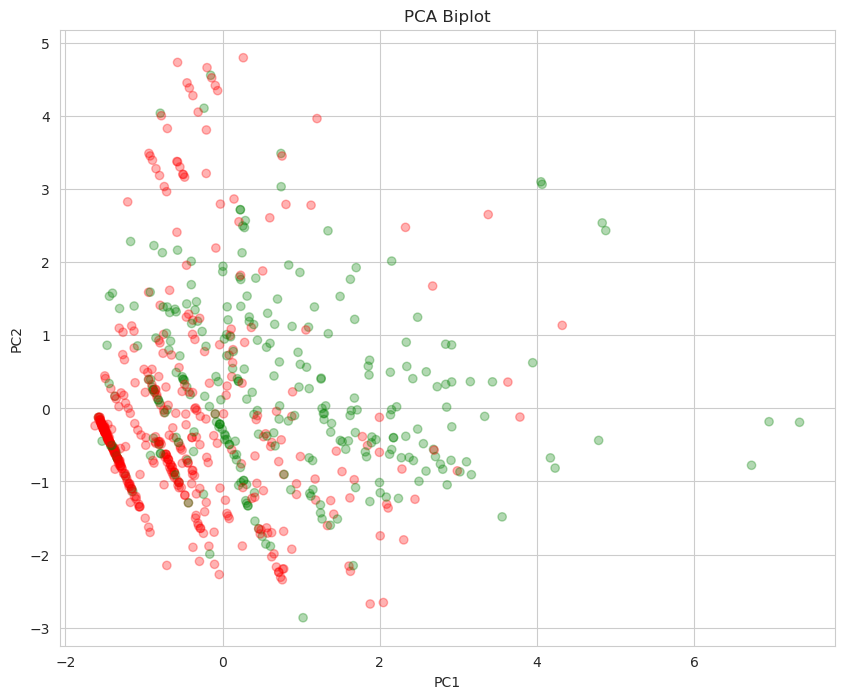

In [89]:
# Create a biplot of the first two principal components
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

conditions = [y==0, y==1]
values = ["red", "green"]

colors = np.select(conditions, values)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.3, color=colors)

# Add feature vectors to the plot
features = list(train_df.columns[:-1])
scalex = 1.0 / (X_train_pca[:, 0].max() - X_train_pca[:, 0].min())
scaley = 1.0 / (X_train_pca[:, 1].max() - X_train_pca[:, 1].min())

# Add axis labels and a title to the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Biplot')

# Show the plot
plt.show()

### Testset

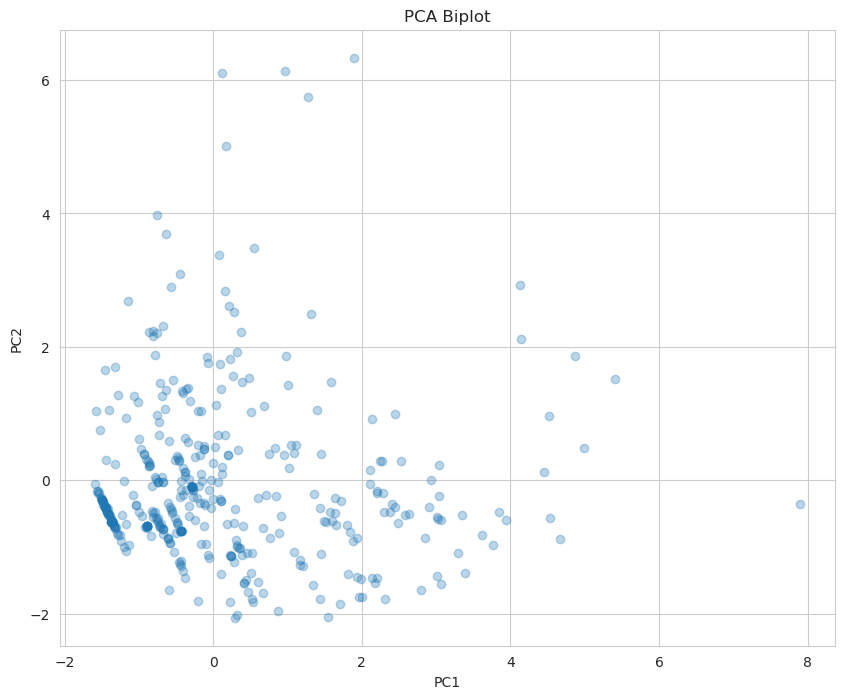

In [90]:
# Create a biplot of the first two principal components
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

conditions = [y==0, y==1]
values = ["red", "green"]

colors = np.select(conditions, values)
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.3)

# Add feature vectors to the plot
features = list(train_df.columns[:-1])
scalex = 1.0 / (X_test_pca[:, 0].max() - X_test_pca[:, 0].min())
scaley = 1.0 / (X_test_pca[:, 1].max() - X_test_pca[:, 1].min())

# Add axis labels and a title to the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Biplot')

# Show the plot
plt.show()

### 3.3.2. 3D Visualization

### Trainset

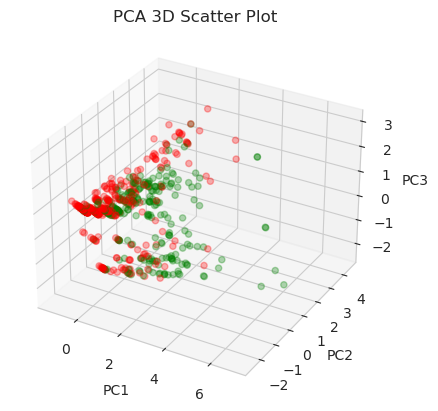

In [91]:
# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], color=colors, alpha=0.3)

# Scale each axis
ax.set_xlim([np.min(X_train_pca[:, 0]), np.max(X_train_pca[:, 0])])
ax.set_ylim([np.min(X_train_pca[:, 1]), np.max(X_train_pca[:, 1])])
ax.set_zlim([np.min(X_train_pca[:, 2]), np.max(X_train_pca[:, 2])])

# Add axis labels and a title to the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot')

# Show the plot
plt.show()

### Testset

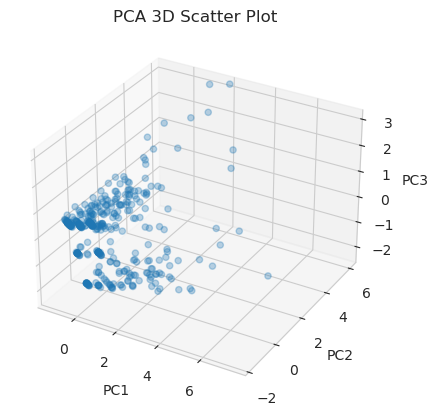

In [92]:
# Create a 3D scatter plot of the first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], alpha=0.3)

# Scale each axis
ax.set_xlim([np.min(X_test_pca[:, 0]), np.max(X_test_pca[:, 0])])
ax.set_ylim([np.min(X_test_pca[:, 1]), np.max(X_test_pca[:, 1])])
ax.set_zlim([np.min(X_test_pca[:, 2]), np.max(X_test_pca[:, 2])])

# Add axis labels and a title to the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Scatter Plot')

# Show the plot
plt.show()

- 뚜렷하게는 아니지만 빨간색 점과 초록점이 구분되는 것을 알 수 있다.
- 차원을 높였을 때 더 잘 구분되기를 희망.

# 4. 여러가지 모델을 사용하여 성능 비교 및 분석
----
### PCA columns 를 가지고 학습.
### PCA 적용, 미적용 했을 때의 성능 비교
### K-Fold 적용
----
- 4.1. Linear Model<br>
    - 4.1.1. Linear Regression<br>
    - 4.1.2. SVM<br>
    - 4.1.3. Logistic Regression <br>
- 4.2. Decision Tree<br>
    - 4.2.1. Decision Tree<br>
    - 4.2.2. Random Forest<br>
- 4.3. Clustering<br>
    - 4.3.2. KMeans<br>
    - 4.3.3. DBScan
- 4.4. Boosting <br>
    - 4.4.1. XGBoost<br>
- 4.5. Deep Learning<br>
    - 4.5.1. Linear Model<br>


In [93]:
from sklearn.model_selection import KFold

# Define the number of folds
n_folds = 5

# Create a KFold object
kf = KFold(n_splits=n_folds)

from collections import defaultdict
results = defaultdict(dict)

In [94]:
def train(model, _X, _y):
    accs = []
    
    for i, (train_index, test_index) in enumerate(kf.split(_X)):
        # Get the training and testing data for this fold
        X_train, X_test = _X[train_index], _X[test_index]
        y_train, y_test = _y[train_index], _y[test_index]

        # Train the model on the training data for this fold
        model.fit(X_train, y_train)

        # Test the model on the testing data for this fold
        score = model.score(X_test, y_test)
        accs.append(score)

        # Print the score for this fold
        print("Fold {}: {}".format(i, score))

    m_acc = np.mean(accs)
    print(f"\nMean Accuracy: {m_acc}")
    return m_acc

In [95]:
import os

def submission(model, X_test):
    if os.path.isfile('submission.csv'):
        os.remove('submission.csv')

    predictions = model.predict(X_test)
    output = pd.DataFrame({"PassengerId": PassengerId.to_numpy(), 'Survived': predictions})
    output.to_csv('submission.csv', index=False)
    print("Your submission was successfully saved!")

## 4.1. Linear Model



### 4.1.1. Linear Classifier

In [96]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

print('No PCA')
acc = train(model, X_train, y)
results["Linear Classifier"]["No PCA"] = acc

print('PCA')
train(model, X_train_pca, y)
results["Linear Classifier"]["PCA"] = acc

No PCA
Fold 0: 0.2971021274442859
Fold 1: 0.3693738905566202
Fold 2: 0.38311527372530974
Fold 3: 0.3385755736049403
Fold 4: 0.43366383217191773

Mean Accuracy: 0.36436613950061475
PCA
Fold 0: 0.29710212744428555
Fold 1: 0.3693738905566203
Fold 2: 0.3831152737253095
Fold 3: 0.3385755736049406
Fold 4: 0.43366383217191795

Mean Accuracy: 0.3643661395006148


### 4.1.2. SVM

In [97]:
from sklearn.svm import SVC

# Create an SVM model
model = SVC(kernel='linear', C=1)

print('No PCA')
acc = train(model, X_train, y)
results["SVM"]["No PCA"] = acc

print('PCA')
train(model, X_train_pca, y)
results["SVM"]["PCA"] = acc

No PCA
Fold 0: 0.8111888111888111
Fold 1: 0.7972027972027972
Fold 2: 0.7692307692307693
Fold 3: 0.7272727272727273
Fold 4: 0.795774647887324

Mean Accuracy: 0.7801339505564858
PCA
Fold 0: 0.8111888111888111
Fold 1: 0.7972027972027972
Fold 2: 0.7692307692307693
Fold 3: 0.7272727272727273
Fold 4: 0.795774647887324

Mean Accuracy: 0.7801339505564858


### 4.1.3. Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

# Create an SVM model
model = LogisticRegression()

print('No PCA')
train(model, X_train, y)

print('PCA')
train(model, X_train_pca, y)

No PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7972027972027972
Fold 2: 0.7762237762237763
Fold 3: 0.7552447552447552
Fold 4: 0.823943661971831

Mean Accuracy: 0.7885649561705901
PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7972027972027972
Fold 2: 0.7762237762237763
Fold 3: 0.7552447552447552
Fold 4: 0.823943661971831

Mean Accuracy: 0.7885649561705901


0.7885649561705901

## 4.2. Decision Tree

### 4.2.1. Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
model = DecisionTreeClassifier(max_depth=3)

print('No PCA')
acc = train(model, X_train, y)
results["Decision Tree"]["No PCA"] = acc

print('PCA')
train(model, X_train_pca, y)
results["Decision Tree"]["PCA"] = acc


No PCA
Fold 0: 0.8321678321678322
Fold 1: 0.7972027972027972
Fold 2: 0.7902097902097902
Fold 3: 0.7692307692307693
Fold 4: 0.8028169014084507

Mean Accuracy: 0.7983256180439279
PCA
Fold 0: 0.6923076923076923
Fold 1: 0.7902097902097902
Fold 2: 0.7972027972027972
Fold 3: 0.7832167832167832
Fold 4: 0.8098591549295775

Mean Accuracy: 0.7745592435733281


### 4.2.2. Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=3)

print('No PCA')
acc = train(model, X_train, y)
results["Random Forest"]["No PCA"] = acc

print('PCA')
train(model, X_train_pca, y)
results["Random Forest"]["PCA"] = acc


No PCA
Fold 0: 0.7272727272727273
Fold 1: 0.7762237762237763
Fold 2: 0.8181818181818182
Fold 3: 0.7692307692307693
Fold 4: 0.8591549295774648

Mean Accuracy: 0.7900128040973111
PCA
Fold 0: 0.7832167832167832
Fold 1: 0.7832167832167832
Fold 2: 0.7972027972027972
Fold 3: 0.7622377622377622
Fold 4: 0.8309859154929577

Mean Accuracy: 0.7913720082734168


## 4.3. Clustering

### 4.3.1. KMeans

In [101]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Cluster the data using k-means with k=3
kmeans = KMeans(n_clusters=2)
model = KNeighborsClassifier(n_neighbors=100)

print('No PCA')
kmeans.fit(X_train)
cluster_labels = kmeans.labels_
acc = train(model, X_train, cluster_labels)
results["KMeans"]["No PCA"] = acc

print('PCA')
kmeans.fit(X_train_pca)
cluster_labels = kmeans.labels_
train(model, X_train_pca, cluster_labels)
results["KMeans"]["PCA"] = acc

No PCA
Fold 0: 0.9230769230769231
Fold 1: 0.9440559440559441
Fold 2: 0.9020979020979021
Fold 3: 0.8951048951048951
Fold 4: 0.8732394366197183

Mean Accuracy: 0.9075150201910764
PCA
Fold 0: 0.916083916083916
Fold 1: 0.9440559440559441
Fold 2: 0.9020979020979021
Fold 3: 0.8951048951048951
Fold 4: 0.8591549295774648

Mean Accuracy: 0.9032995173840244


### 4.3.2. DBScan

In [102]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

# Cluster the data using DBSCAN with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)
model = KNeighborsClassifier(n_neighbors=5)

print('No PCA')
dbscan.fit(X_train)
cluster_labels = dbscan.labels_
acc = train(model, X_train, y)
results["DBSCAN"]["No PCA"] = acc

print('PCA')
dbscan.fit(X_train_pca)
cluster_labels = dbscan.labels_
train(model, X_train_pca, y)
results["DBSCAN"]["PCA"] = acc

No PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7902097902097902
Fold 2: 0.8181818181818182
Fold 3: 0.7972027972027972
Fold 4: 0.8169014084507042

Mean Accuracy: 0.80254112085098
PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7902097902097902
Fold 2: 0.8181818181818182
Fold 3: 0.7972027972027972
Fold 4: 0.8169014084507042

Mean Accuracy: 0.80254112085098


## 4.4.Boosting 
### 4.4.1. XGBoost

In [103]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

print('No PCA')
acc = train(model, X_train, y)
results["XGBoost"]["No PCA"] = acc

print('PCA')
train(model, X_train_pca, y)
results["XGBoost"]["PCA"] = acc

No PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7902097902097902
Fold 2: 0.8181818181818182
Fold 3: 0.7972027972027972
Fold 4: 0.8169014084507042

Mean Accuracy: 0.80254112085098
PCA
Fold 0: 0.7902097902097902
Fold 1: 0.7902097902097902
Fold 2: 0.8181818181818182
Fold 3: 0.7972027972027972
Fold 4: 0.8169014084507042

Mean Accuracy: 0.80254112085098


## 4.5. Deep Learning

### 4.5.1. Linear Model

In [104]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.nn.init as init
from torchvision import datasets, transforms
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm


def np2dataloader(X, y=None):
    # Prepare data
    X_tensor = torch.Tensor(X)
    
    if y is None:
        X_dataset = TensorDataset(X_tensor)
    else:
        y_tensor = torch.Tensor(y)
        X_dataset = TensorDataset(X_tensor, y_tensor)

    X_loader = torch.utils.data.DataLoader(X_dataset, batch_size=len(X_dataset), shuffle=True)
    return X_loader

X_train_loader = np2dataloader(X_train, y)
X_train_pca_loader = np2dataloader(X_train_pca, y)
X_test_loader = np2dataloader(X_test)
X_test_pca_loader = np2dataloader(X_test_pca)

# Prepare data
# X_train_tensor = torch.Tensor(X_train)
# X_train_pca_tensor = torch.Tensor(X_train_pca)
# X_test_tensor = torch.Tensor(X_test)
# X_test_pca_tensor = torch.Tensor(X_test_pca)
# y_tensor = torch.Tensor(y)

# X_train_dset = TensorDataset(X_train_tensor, y_tensor)
# X_train_pca_dset = TensorDataset(X_train_pca_tensor, y_tensor)
# X_test_dset = TensorDataset(X_test_tensor)
# X_test_pca_dset = TensorDataset(X_test_pca_tensor)

# X_train_loader = torch.utils.data.DataLoader(X_train_dset, batch_size=8, shuffle=True)
# X_train_pca_loader = torch.utils.data.DataLoader(X_train_pca_dset, batch_size=8, shuffle=True)
# X_test_loader = torch.utils.data.DataLoader(X_test_dset, batch_size=1, shuffle=False)
# X_test_pca_loader = torch.utils.data.DataLoader(X_test_pca_dset, batch_size=1, shuffle=False)

In [115]:
# Define a neural network
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.lin1 = self._build_linear_layer(7, 16)
        self.lin2 = self._build_linear_layer(16, 32)
        self.lin3 = self._build_linear_layer(32, 64)
        self.lin4 = self._build_linear_layer(64, 128)
        self.lin5 = self._build_linear_layer(128, 256)
        
        self.fc = nn.Linear(256, 2)
        
        # Initialize the weights of the linear layers with Xavier initialization
        for module in self.modules():
            if isinstance(module, nn.Linear):
                init.xavier_uniform_(module.weight)
                if module.bias is not None:
                    module.bias.data.fill_(0.01)
        
    def _build_linear_layer(self, in_channel, out_channel):
        return nn.Sequential(
            nn.Linear(in_channel, out_channel),
            nn.BatchNorm1d(out_channel),
            nn.LeakyReLU(inplace=True)
        )
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.lin2(x)
        x = self.lin3(x)
        x = self.lin4(x)
        x = self.lin5(x)
        x = self.fc(x)
            
        return x

def train_dl(model, X, y, optimizer, criterion):
    accs = []
    
    best_acc = 0
    best_model = None
    for i, (train_index, val_index) in enumerate(kf.split(X)):
        # Get the training and testing data for this fold
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        X_train_loader = np2dataloader(X_train, y_train)
        X_val_loader = np2dataloader(X_val, y_val)
        
        # Train the model on the training data for this fold
        model.train()
        for _X, _y in X_train_loader:
            optimizer.zero_grad()
            output = model(_X)
            loss = criterion(output, _y.long())
            loss.backward()
            optimizer.step()

        # Test the model on the testing data for this fold
        model.eval()
        val_correct = 0
        for _X, _y in X_val_loader:
            output = model(_X)
            _, predicted = torch.max(output.data, 1)
            val_correct += (predicted == _y).sum().item()
        val_accuracy = val_correct / len(X_val)
        accs.append(val_accuracy)

        # Save best model
        if val_accuracy > best_acc:
            best_acc = val_accuracy
            best_model = deepcopy(model)

    m_acc = np.mean(accs)
    return m_acc
    

def get_best_model(model, X, y):
    # Train the network 
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.CrossEntropyLoss()
    
    best_model = LinearModel()
    best_acc = 0
    for epoch in tqdm(range(100)):
        acc = train_dl(model, X, y, optimizer, criterion)

        if acc > best_acc:
            best_acc = acc
            best_model.load_state_dict(model.state_dict())

    return best_model

In [118]:
def accuracy(model, val_loader):
    model.eval()
    val_correct = 0
    for X, y in val_loader:
        output = model(X)
        _, predicted = torch.max(output.data, 1)
        val_correct += (predicted == y).sum().item()
    val_accuracy = val_correct / len(X_train)
    return val_accuracy


model_no_pca = LinearModel()

best_model_no_pca = get_best_model(model_no_pca, X_train, y)
acc = accuracy(best_model_no_pca, X_train_loader) 
print(f"No PCA best accuracy: {acc}")
results["DL Linear Model"]["No PCA"] = acc

model_pca = LinearModel()

best_model_pca = get_best_model(model_pca, X_train_pca, y)
acc = accuracy(best_model_pca, X_train_pca_loader) 
print(f"PCA best accuracy: {acc}")
results["DL Linear Model"]["PCA"] = acc

100%|██████████| 100/100 [00:07<00:00, 13.34it/s]


No PCA best accuracy: 0.9425770308123249


100%|██████████| 100/100 [00:07<00:00, 13.71it/s]

PCA best accuracy: 0.957983193277311


# 5. 결과 확인

In [119]:
for k, v in results.items():
    print(f"{k}: {v}")

Linear Classifier: {'No PCA': 0.36436613950061475, 'PCA': 0.36436613950061475}
SVM: {'No PCA': 0.7801339505564858, 'PCA': 0.7801339505564858}
Decision Tree: {'No PCA': 0.7983256180439279, 'PCA': 0.7983256180439279}
Random Forest: {'No PCA': 0.7900128040973111, 'PCA': 0.7900128040973111}
KMeans: {'No PCA': 0.9075150201910764, 'PCA': 0.9075150201910764}
DBSCAN: {'No PCA': 0.80254112085098, 'PCA': 0.80254112085098}
XGBoost: {'No PCA': 0.80254112085098, 'PCA': 0.80254112085098}
DL Linear Model: {'No PCA': 0.9425770308123249, 'PCA': 0.957983193277311}
